In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
index = pd.read_excel("grade.xlsx")
index.head()

,subject,term,midtest,finaltest,other,weight_test,kredit,score,type
0,ekbang,3,51.0,60.0,80.000000,0.7,3,62.85,campur
1,ekmis,5,88.0,87.5,87.500000,0.6,3,87.65,campur
2,AKP,6,57.0,86.0,87.000000,0.7,3,76.15,campur
3,epi,6,81.0,95.0,88.333333,0.7,3,88.10,campur
4,itb,6,82.0,92.0,80.666667,0.7,2,85.10,campur


In [3]:
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
subject        41 non-null object
term           41 non-null int64
midtest        41 non-null float64
finaltest      41 non-null float64
other          40 non-null float64
weight_test    41 non-null float64
kredit         41 non-null int64
score          41 non-null float64
type           41 non-null object
dtypes: float64(5), int64(2), object(2)
memory usage: 3.0+ KB


In [4]:
index.jenis = index["type"].astype("category")

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


**In aggregate, the subject types consist of three types, both midtest and finaltest, both paper writing, or mix (writing in finaltest). So all midtest for tests and mixed type is test**

# How Well My Test

In [5]:
ujian = pd.DataFrame(index[index["type"]!= "esai"])
campur = pd.DataFrame(ujian[ujian["type"]!= "campur"])
ujian.describe()

,term,midtest,finaltest,other,weight_test,kredit,score
count,35.000000,35.0000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,3.314286,75.0000,76.864286,83.048095,0.672857,2.942857,78.854000
std,1.693785,13.9595,12.001125,15.610362,0.118410,0.937546,7.695879
min,1.000000,32.0000,51.250000,0.000000,0.400000,1.000000,60.700000
25%,2.000000,70.0000,67.000000,80.708333,0.600000,3.000000,75.525000
50%,3.000000,78.0000,78.000000,83.750000,0.700000,3.000000,80.160000
75%,5.000000,85.5000,84.500000,89.166667,0.700000,3.000000,85.000000
max,6.000000,93.0000,100.000000,100.000000,1.000000,6.000000,88.800000


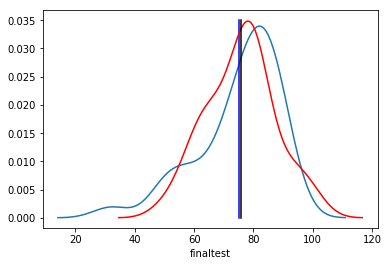

In [6]:
sns.distplot(ujian.midtest, norm_hist=True, hist=False)
plt.plot([ujian.midtest.mean(), ujian.midtest.mean()], [0,.035], color="b")
sns.distplot(campur.finaltest, norm_hist=True, color="red", hist=False)
plt.plot([campur.finaltest.mean(), campur.finaltest.mean()], [0,.035], color="black")

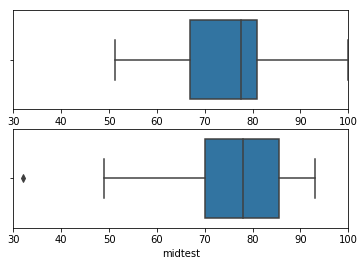

In [7]:
plt.subplot(2,1,1)
sns.boxplot(campur.finaltest)
plt.xlim(30,100)
plt.subplot(2,1,2)
sns.boxplot(ujian.midtest)
plt.xlim(30,100)
plt.show()

In [8]:
uji = pd.concat([campur.finaltest, ujian.midtest], axis=0)
uji = uji.dropna()
uji.describe()

count     65.000000
mean      75.303846
std       12.776206
min       32.000000
25%       67.000000
50%       78.000000
75%       83.000000
max      100.000000
dtype: float64

# My Essay Score

In [9]:
tulisan = pd.DataFrame(index[index["type"]!= "ujian"])
tulisan.info()                             

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 9 columns):
subject        11 non-null object
term           11 non-null int64
midtest        11 non-null float64
finaltest      11 non-null float64
other          10 non-null float64
weight_test    11 non-null float64
kredit         11 non-null int64
score          11 non-null float64
type           11 non-null object
dtypes: float64(5), int64(2), object(2)
memory usage: 880.0+ bytes


In [10]:
uas = tulisan["finaltest"].where(tulisan["type"]=="campur")
uts = tulisan["midtest"]
hj = pd.concat([uas, uts], axis=0)
hj = hj.dropna()
hj.describe()

count    16.000000
mean     79.510625
std      13.308286
min      51.000000
25%      73.127500
50%      84.750000
75%      88.250000
max      95.000000
dtype: float64

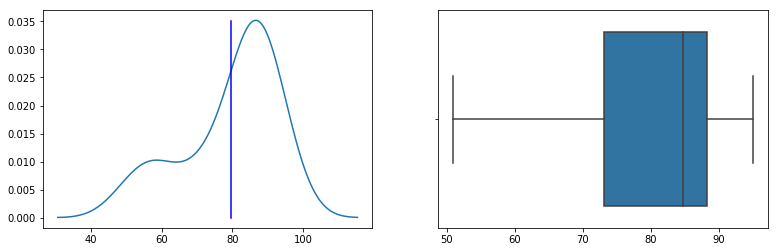

In [11]:
plt.figure(figsize=(13, 4))
plt.subplot(1,2,1)
sns.distplot(hj, hist=False)
plt.plot([hj.mean(), hj.mean()], [0,.035], color="b")
plt.subplot(1,2,2)
sns.boxplot(hj)

# Compare

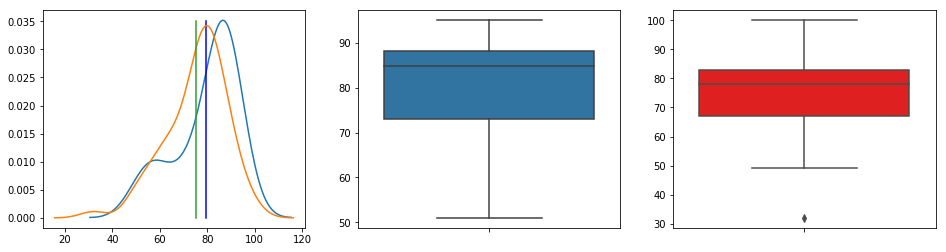

In [12]:
plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
sns.distplot(hj, hist=False)
plt.plot([hj.mean(), hj.mean()], [0,.035], color="b")
sns.distplot(uji, hist=False)
plt.plot([uji.mean(), uji.mean()], [0,.035])
plt.subplot(1,3,2)
sns.boxplot(hj, orient="v")
plt.subplot(1,3,3)
sns.boxplot(uji, orient="v", color="red")

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


(0, 0.06825)

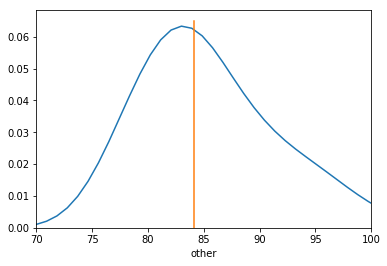

In [13]:
# Other Score like Homework, Short Essay, Weekly Taks, Presentation, Presency, etc
sns.distplot(index.other, hist=False)
plt.plot([index.other.median(),index.other.median()], [0,.065])
plt.xlim(70, 100)
plt.ylim(0)

In [14]:
index["other_we"] = 1 - index["weight_test"]
print ("Average Other Weight in Final Score, Exclude Midtest and Finaltest is " + str(index.other_we.mean()))

Average Other Weight in Final Score, Exclude Midtest and Finaltest is 0.31951219512195134
